In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
df= pd.read_csv(r"C:\Users\NIHAL_MIRAJ\Desktop\adult_with_headers.csv")

In [4]:
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [8]:
# Standard Scaling (Z-score Normalization)
standard_scaler = StandardScaler()
df[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])

In [9]:
#Min-Max Scaling 
minmax_scaler = MinMaxScaler()
df[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])

In [10]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


In [11]:
df1= pd.read_csv(r"C:\Users\NIHAL_MIRAJ\Desktop\adult_with_headers.csv")

Text(0.5, 1.0, 'Distribution of age Before Scaling')

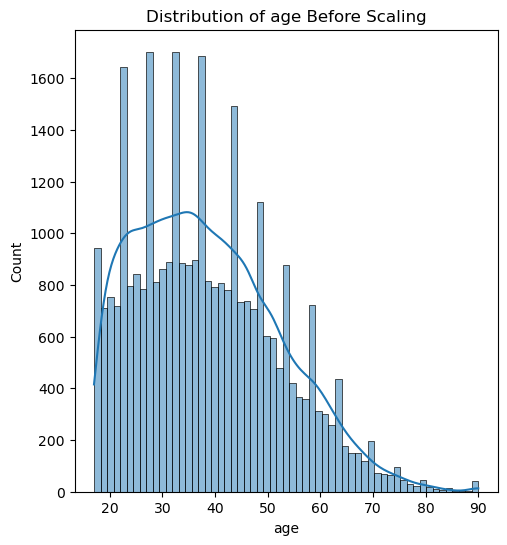

In [12]:
feature_to_plot = 'age'  
# Before scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1[feature_to_plot], kde=True)
plt.title(f'Distribution of {feature_to_plot} Before Scaling')

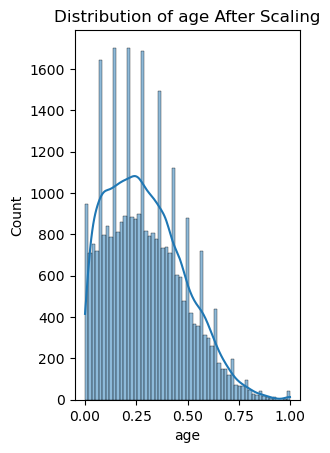

In [13]:
plt.subplot(1, 2, 2)
sns.histplot(df[feature_to_plot], kde=True)
plt.title(f'Distribution of {feature_to_plot} After Scaling')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  float64
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [15]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [16]:
for col in categorical_cols:
    if df[col].nunique() < 5:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

In [17]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,0.02174,0.0,0.397959,United-States,1,0
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,0.00000,0.0,0.122449,United-States,1,0
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,0.00000,0.0,0.397959,United-States,1,0
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.00000,0.0,0.397959,United-States,1,0
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,0.00000,0.0,0.397959,Cuba,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   capital_gain    32561 non-null  float64
 10  capital_loss    32561 non-null  float64
 11  hours_per_week  32561 non-null  float64
 12  native_country  32561 non-null  object 
 13  sex_ Male       32561 non-null  uint8  
 14  income_ >50K    32561 non-null  uint8  
dtypes: float64(6), object(7), uint8(2)
memory usage: 3.3+ MB


In [19]:
categorical_cols1 = df.select_dtypes(include=['object']).columns

In [20]:
label_encoder = LabelEncoder()
for col in categorical_cols1:
    if df[col].nunique() >= 5:
        df[col] = label_encoder.fit_transform(df[col])

In [21]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0.021740,0.0,0.397959,39,1,0
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0.000000,0.0,0.122449,39,1,0
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0.000000,0.0,0.397959,39,1,0
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0.000000,0.0,0.397959,39,1,0
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,0.000000,0.0,0.397959,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,5,4,0.000000,0.0,0.377551,39,0,0
32557,0.315068,4,0.096500,11,0.533333,2,7,0,4,0.000000,0.0,0.397959,39,1,1
32558,0.561644,4,0.094827,11,0.533333,6,1,4,4,0.000000,0.0,0.397959,39,0,0
32559,0.068493,4,0.128499,11,0.533333,4,1,3,4,0.000000,0.0,0.193878,39,1,0


### One-Hot Encoding

### Pros:
No Assumption of Ordinality: One-Hot Encoding is ideal for nominal categorical variables (those with no inherent order, like colors or types) because it does not assume any ordering between categories.

Prevents Misinterpretation by Models: It avoids the risk of machine learning models incorrectly interpreting numerical labels as having a meaningful order (which might happen with Label Encoding).


## Cons:
Increases Dimensionality: If a categorical column has many unique categories, One-Hot Encoding can significantly increase the number of features in the dataset, making it computationally expensive and prone to overfitting.

Sparsity: The resulting matrix will often have a lot of zeros (sparse matrix), which can affect memory usage and computational efficiency

### Label Encoding

## Pros:
Efficient: It only creates one new column, which is computationally efficient, especially when there are many unique categories.

Works Well for Ordinal Variables: Label Encoding is ideal for ordinal categorical variables (those with a natural order, like "Low", "Medium", "High"), as it preserves the order of the categories.

Reduces Dimensionality: Since it only adds one column, it doesn’t increase the number of features, unlike One-Hot Encoding.

## Cons:
Assumes Ordinality: Label Encoding can mislead machine learning models if applied to nominal variables because it assigns arbitrary numerical values (like 0, 1, 2), which could suggest an unintended order or relationship between categories.

Model Interpretation: Some models might interpret the encoded numbers as having a mathematical relationship (e.g., 2 > 1 > 0), which doesn’t make sense for nominal data.


In [22]:
def age_group(age):
    if age < 25:
        return 'Young'
    elif 25 <= age < 45:
        return 'Middle-aged'
    else:
        return 'Senior'

df['Age Group'] = df['age'].apply(age_group)

In [23]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,Age Group
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0.021740,0.0,0.397959,39,1,0,Young
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0.000000,0.0,0.122449,39,1,0,Young
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0.000000,0.0,0.397959,39,1,0,Young
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0.000000,0.0,0.397959,39,1,0,Young
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,0.000000,0.0,0.397959,5,0,0,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,5,4,0.000000,0.0,0.377551,39,0,0,Young
32557,0.315068,4,0.096500,11,0.533333,2,7,0,4,0.000000,0.0,0.397959,39,1,1,Young
32558,0.561644,4,0.094827,11,0.533333,6,1,4,4,0.000000,0.0,0.397959,39,0,0,Young
32559,0.068493,4,0.128499,11,0.533333,4,1,3,4,0.000000,0.0,0.193878,39,1,0,Young


In [24]:
df['Income_per_Hour'] = df['capital_gain'] / df['hours_per_week']

## Applied to "capital-gain" to reduce skewness and improve model performance by making the distribution more normal

In [25]:
import numpy as np
df['Log_Capital_Gain'] = np.log(df['capital_gain'] + 1)

In [26]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,Age Group,Income_per_Hour,Log_Capital_Gain
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0.021740,0.0,0.397959,39,1,0,Young,0.054629,0.021507
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0.000000,0.0,0.122449,39,1,0,Young,0.000000,0.000000
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0.000000,0.0,0.397959,39,1,0,Young,0.000000,0.000000
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0.000000,0.0,0.397959,39,1,0,Young,0.000000,0.000000
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,0.000000,0.0,0.397959,5,0,0,Young,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,5,4,0.000000,0.0,0.377551,39,0,0,Young,0.000000,0.000000
32557,0.315068,4,0.096500,11,0.533333,2,7,0,4,0.000000,0.0,0.397959,39,1,1,Young,0.000000,0.000000
32558,0.561644,4,0.094827,11,0.533333,6,1,4,4,0.000000,0.0,0.397959,39,0,0,Young,0.000000,0.000000
32559,0.068493,4,0.128499,11,0.533333,4,1,3,4,0.000000,0.0,0.193878,39,1,0,Young,0.000000,0.000000


In [27]:
from sklearn.ensemble import IsolationForest

In [28]:
df.dtypes

age                 float64
workclass             int32
fnlwgt              float64
education             int32
education_num       float64
marital_status        int32
occupation            int32
relationship          int32
race                  int32
capital_gain        float64
capital_loss        float64
hours_per_week      float64
native_country        int32
sex_ Male             uint8
income_ >50K          uint8
Age Group            object
Income_per_Hour     float64
Log_Capital_Gain    float64
dtype: object

In [29]:
numerical_cols1 = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols1

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'Income_per_Hour', 'Log_Capital_Gain'],
      dtype='object')

In [30]:
iso_forest = IsolationForest(contamination=0.05)  # 5% of data as outliers
outliers = iso_forest.fit_predict(df[numerical_cols1])

In [31]:
df['outlier'] = outliers
df_cleaned = df[df['outlier'] == 1].drop(columns=['outlier'])

In [32]:
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (32561, 19)
Cleaned DataFrame shape: (30933, 18)


In [33]:

import ppscore as pps


In [ ]:
import ppscore as pps
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Handle invalid values in 'age' column
df['age'].replace([float('inf'), float('-inf')], np.nan, inplace=True)  # Replace inf values with NaN
df['age'].fillna(df['age'].median(), inplace=True)  # Fill NaN values with median

# Ensure the 'age' column is numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate PPS matrix
pps_matrix = pps.matrix(numeric_df)

# Transform the PPS matrix into a format suitable for a heatmap
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pps_pivot, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("PPS Matrix for Feature Relationships")
plt.show()


In [40]:
pps_matrix.dtypes
numeric_pps_matrix = pps_matrix.select_dtypes(include=[float, int])
plt.figure(figsize=(12, 8))
sns.heatmap(
    pps_matrix.astype(float),  # Convert to numeric if possible
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("PPS Matrix for Feature Relationships")
plt.show()

pps_matrix = pps_matrix.apply(pd.to_numeric, errors='coerce')

ValueError: could not convert string to float: 'age'

<Figure size 1200x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pps_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("PPS Matrix for Feature Relationships")
plt.show()

In [41]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

NameError: name 'correlation_matrix' is not defined